In [129]:
# Import Required Libraries
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [130]:
# Define Stock Symbol
stock_symbol = "TSLA"

# Download historical data from Yahoo Finance
data = yf.download(stock_symbol, start='2010-01-01', auto_adjust=False, end='2025-03-07')
data.tail(100)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-10-09,241.050003,241.050003,247.429993,239.509995,243.820007,66289500
2024-10-10,238.770004,238.770004,242.789993,232.339996,241.809998,83087100
2024-10-11,217.800003,217.800003,223.339996,214.380005,220.130005,142628900
2024-10-14,219.160004,219.160004,221.910004,213.740005,220.130005,86291900
2024-10-15,219.570007,219.570007,224.259995,217.119995,220.009995,62988800
...,...,...,...,...,...,...
2025-02-27,281.950012,281.950012,297.230011,280.880005,291.160004,101748200
2025-02-28,292.980011,292.980011,293.880005,273.600006,279.500000,115697000


In [131]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3694 entries, 2010-06-29 to 2025-03-05
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  3694 non-null   float64
 1   (Close, TSLA)      3694 non-null   float64
 2   (High, TSLA)       3694 non-null   float64
 3   (Low, TSLA)        3694 non-null   float64
 4   (Open, TSLA)       3694 non-null   float64
 5   (Volume, TSLA)     3694 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 202.0 KB


In [132]:
data.describe(include="all")

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3.694000e+03
mean,84.782624,84.782624,86.688792,82.815065,84.826161,9.650407e+07
std,111.339389,111.339389,113.957098,108.693362,111.468009,7.733969e+07
min,1.053333,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.229334,12.229334,12.456333,12.015833,12.241667,4.940438e+07
50%,18.332334,18.332334,18.644000,17.978667,18.333332,8.198130e+07
75%,182.914997,182.914997,186.387501,178.959999,183.072502,1.216508e+08
max,479.859985,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [133]:
data.corr()


,Price,Adj Close,Close,High,Low,Open,Volume
,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Price,Ticker,,,,,,
Adj Close,TSLA,1.000000,1.000000,0.999642,0.999690,0.999213,0.084324
Close,TSLA,1.000000,1.000000,0.999642,0.999690,0.999213,0.084324
High,TSLA,0.999642,0.999642,1.000000,0.999636,0.999721,0.086900
Low,TSLA,0.999690,0.999690,0.999636,1.000000,0.999622,0.080261
Open,TSLA,0.999213,0.999213,0.999721,0.999622,1.000000,0.083336
Volume,TSLA,0.084324,0.084324,0.086900,0.080261,0.083336,1.000000


<Axes: xlabel='Price,Ticker'>

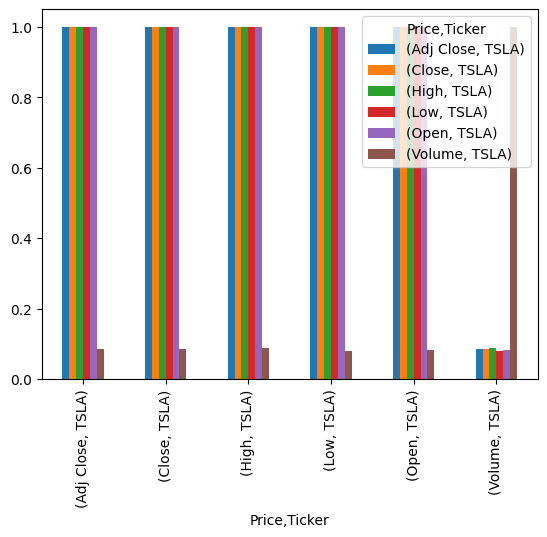

In [134]:
data.corr().plot(kind="bar")

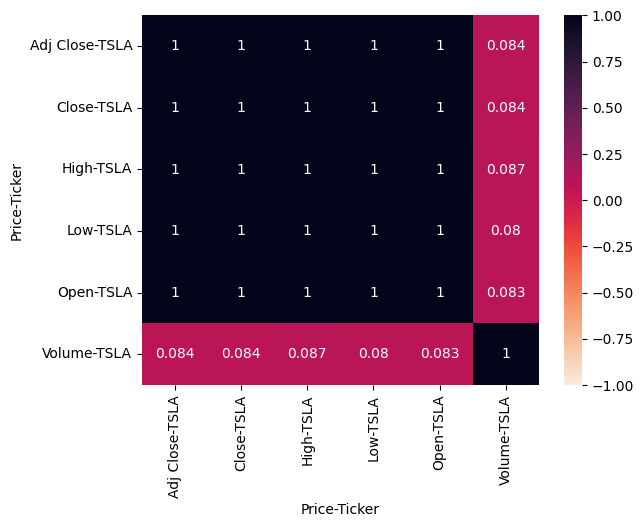

In [135]:
sns.heatmap(data.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [136]:
# Drop unneccesary Columns
data.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
data.tail(20)

Price,Close,High,Low,Open
Ticker,TSLA,TSLA,TSLA,TSLA
Date,,,,
2025-02-05,378.170013,388.390015,375.529999,387.510010
2025-02-06,374.320007,375.399994,363.179993,373.029999
2025-02-07,361.619995,380.549988,360.339996,370.190002
2025-02-10,350.730011,362.700012,350.510010,356.209991
2025-02-11,328.500000,349.369995,325.100006,345.799988
2025-02-12,336.510010,346.399994,329.119995,329.940002
2025-02-13,355.940002,358.690002,342.850006,345.000000
2025-02-14,355.839996,362.000000,347.500000,360.619995


<Axes: xlabel='Date'>

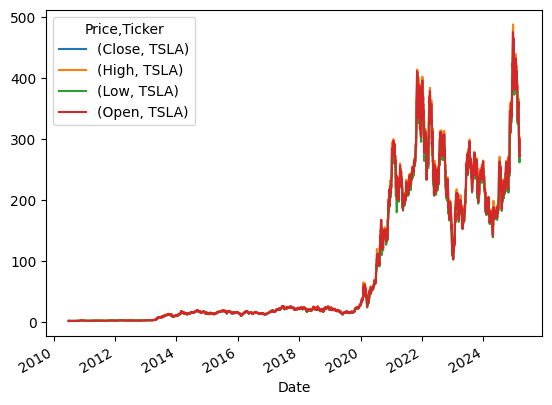

In [137]:
data.plot()


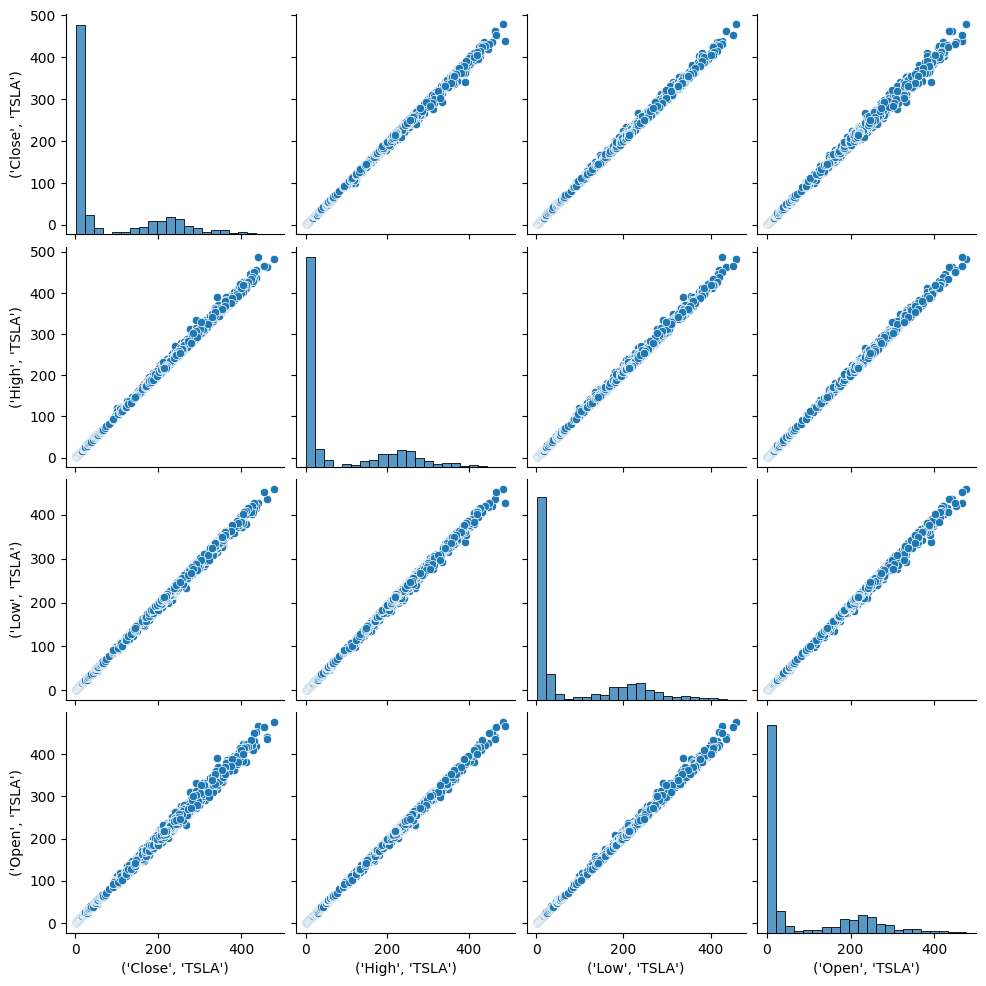

In [138]:
sns.pairplot(data)

In [139]:
# Declare two variables to hold the two sets
x= data[['Open', 'High', 'Low']].values 
y= data[['Close']].values

# You can out put variables x and y to see their result
print(x)
print('------')
print(y)

[[  1.26666701   1.66666698   1.16933298]
 [  1.71933305   2.02800012   1.55333304]
 [  1.66666698   1.72800004   1.35133302]
 ...
 [300.33999634 303.94000244 277.29998779]
 [270.92999268 284.3500061  261.83999634]
 [272.95999146 279.54000854 267.70999146]]
------
[[  1.59266698]
 [  1.58866704]
 [  1.46399999]
 ...
 [284.6499939 ]
 [272.04000854]
 [279.1000061 ]]


In [153]:
# import train_test_split
from sklearn.model_selection import train_test_split

# Split data into two sets 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) 

[1.96733296 2.01666689 1.81400001]
[1.82333302]


In [141]:
# Instantiate Linear Regression
model = LinearRegression()

#Train model
model.fit(x_train,y_train)

LinearRegression()

In [163]:
# Make prediction on test data
prediction = model.predict(x_test)
# print(x_test)
# print(x_test[22])

y = model.predict([[279.10, 277, 280]])
print(y)
#Predict it
# prediction

[[278.39836374]]


In [154]:
# Compare Actual and Predicted
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
comparison.head(20)

,Actual,Predicted
0,1.823333,1.904454
1,239.896667,244.285708
2,13.400000,13.502700
3,258.019989,252.295127
4,361.533325,358.806200
5,16.463333,16.650561
6,17.743334,17.837121
7,15.141333,15.183646
8,15.116667,14.941290
9,20.775999,20.909451


Text(0, 0.5, 'Closing Price')

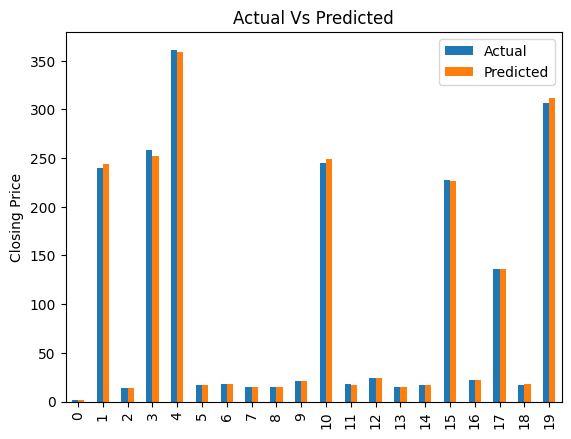

In [164]:
# Visualize the comparison using MatPlotlib
cGraph = comparison.head(20)
cGraph.plot(kind='bar')
plt.title('Actual Vs Predicted')
plt.ylabel('Closing Price')

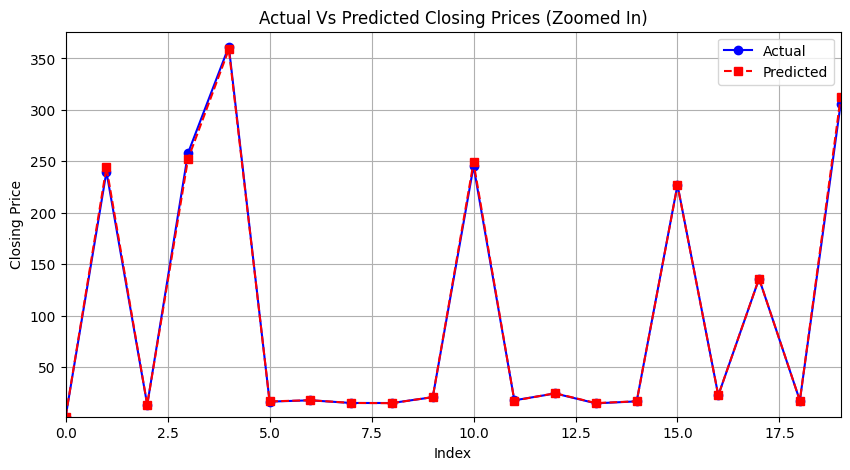

In [173]:


# Selecting the top 20 rows for visualization
cGraph = comparison.head(20)

# Plotting the actual vs predicted closing prices
plt.figure(figsize=(10, 5))
plt.plot(cGraph.index, cGraph['Actual'], marker='o', label='Actual', linestyle='-', color='blue')
plt.plot(cGraph.index, cGraph['Predicted'], marker='s', label='Predicted', linestyle='--', color='red')

# Adding title and labels
plt.title('Actual Vs Predicted Closing Prices (Zoomed In)')
plt.xlabel('Index')
plt.ylabel('Closing Price')

# Setting x-axis and y-axis limits for zoom effect
plt.xlim(min(cGraph.index), max(cGraph.index))  # Adjust x-axis range
plt.ylim(cGraph[['Actual', 'Predicted']].min().min() * 0.98, 
         cGraph[['Actual', 'Predicted']].max().max() * 1.04)  # Slightly padding y-axis

plt.legend()
plt.grid(True)
plt.show()



In [145]:
# Let's score this model using the test data
model.score(x_test, y_test)

0.9997462592076095

In [146]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.9997462592076095

In [147]:
# Libraries
import math
from sklearn import metrics

#Metrics to find accuracy of continous variables
print('_____________________________________')
print('Mean Absolute Error (MAE)')
mav = metrics.mean_absolute_error(y_test, prediction)
print('MAE Value:' ,mav)

print('_____________________________________')
print('Mean Squared Error (MSE)')
mse = metrics.mean_squared_error(y_test, prediction)
print('MSE Value:' ,mse)

print('_____________________________________')
print('Root Mean Squared Error Value (RMSE)')
rmse = math.sqrt(metrics.mean_squared_error(y_test,prediction))
print('RMSE Value:' , rmse)

_____________________________________
Mean Absolute Error (MAE)
MAE Value: 0.8283915416413691
_____________________________________
Mean Squared Error (MSE)
MSE Value: 3.2000690578433835
_____________________________________
Root Mean Squared Error Value (RMSE)
RMSE Value: 1.7888736841497175
